<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200420_%EC%9E%90%EB%A3%8C%EC%9A%94%EC%95%BD%2C%EC%9E%AC%EA%B5%AC%EC%A1%B0%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

###자료 요약(1) - 최솟값, 최댓값, 합, 평균, 중위수, 개수

> url = http://youngho.iwinv.net/data/titanic.csv

In [ ]:
data_file = 'http://youngho.iwinv.net/data/titanic.csv'
data_raw = pd.read_csv(data_file)
data_raw

#1309x15

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [ ]:
#나이에 대한 최솟값 
data_raw.age.min()
data_raw['age'].min()

0.16670000599999998

In [ ]:
#나이에 대한 최댓값 
data_raw.age.max()
data_raw['age'].max()

80.0

In [ ]:
#나이에 대한 합
data_raw.age.sum()
data_raw['age'].sum()

31255.666700006

In [ ]:
#나이에 대한 평균
data_raw.age.mean()

29.881134512434034

In [ ]:
#나이에 대한 중위수, 중앙값, 제2사분위수
data_raw.age.median()

28.0

In [ ]:
#개수
data_raw.age.count() # missing value빼고 계산

1046

In [ ]:
#수치형 자료 요약
data_raw_desc = data_raw.describe()
data_raw_desc

,Unnamed: 0,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.486055,14.413500,1.041658,0.865560,51.758669,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329224,328.000000


In [ ]:
data_raw_desc.loc['mean','age'] #행,열

29.881134512434034

###자료요약 (2) - pandas.groupby()

> 행의 값에 따른 그룹별 요약

In [ ]:
###성별에 따른 나이의 평균
data_group = data_raw.groupby('sex')
data_group['age'].mean() #남, 녀 각각 나옴
data_group.age.mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [ ]:
#성별에 따른 생존자의 수
data_group.survived.sum() #F 01 M 01 더하면 1만 더해지니까 생존자수가 나옴 0은 안더해지니까!
#0 과1로 코딩되어있는 애들은 비율이 된다. 
data_group.survived.mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [ ]:
### 성별 $ 등급의 생존비율 // F123 M123 6개의 카테고리가 생성됨
cols = ['sex','pclass']
data_group = data_raw.groupby(cols)
data_group.survived.mean() #1등급이 젤 많이살아남음 비율로

sex     pclass
female  1st       0.965278
        2nd       0.886792
        3rd       0.490741
male    1st       0.340782
        2nd       0.146199
        3rd       0.152130
Name: survived, dtype: float64

### 데이터 재구조화(reshape) - pandas.melt()

In [ ]:
data_file = 'http://youngho.iwinv.net/data/power_station.xlsx'
data_excel = pd.ExcelFile(data_file)
data_excel.sheet_names

['2014년', '2015년', '2016년', '2017년', '2018년']

In [ ]:
data_2018 = data_excel.parse('2018년')
data_2018 #변수가 1시2시3시(가로)를 세로로 바꾸고싶다. 시간별로 

,날짜,발전기명,발전기코드,발전/펌핑구분,01시,02시,03시,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2018-01-01,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,35496,213192,569304,773784,837000,822024,700920,350064,78768,8712,0,0,0,0,0,0
1,2018-01-02,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,43488,230760,481320,633168,668736,638352,518616,227016,64296,13752,0,0,0,0,0,0
2,2018-01-03,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,27288,84168,306720,429048,543960,613368,349560,252504,47736,10008,0,0,0,0,0,0
3,2018-01-04,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,10080,61128,133632,236736,335808,423360,324792,118152,40824,0,0,0,0,0,0,0
4,2018-01-05,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,11232,102096,41040,114192,133488,127224,115920,57816,12816,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,49608,64080,84888,338256,412056,487728,245808,110952,27576,0,0,0,0,0,0,0
361,2018-12-28,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,0,114552,109152,333648,514944,360936,243000,165240,55440,0,0,0,0,0,0,0
362,2018-12-29,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,10008,39888,120816,450144,592560,613152,707112,342216,56232,7776,0,0,0,0,0,0
363,2018-12-30,농촌공진도태양광,9389,10,0,0,0,0,0,0,0,0,11736,215784,255600,381816,754200,756216,650016,220752,86904,0,0,0,0,0,0,0


In [ ]:
data_2018.columns #기준은 날짜로, 1시~24시 재구조화할 변수
id_var = data_2018.columns[0]
var_names = data_2018.columns[4:]
data_melt = pd.melt(data_2018, id_var, var_names)

In [ ]:
### 데이터프레임 정렬
by_values = ['날짜','variable'] #날짜기준, 날짜가 같다면 varible기준으로
data_melt = data_melt.sort_values(by_values) #정렬만해주고 저장은 안됨 //inplace=True 정렬시킨다음 그 값을 다시저장
data_melt

,날짜,variable,value
0,2018-01-01,01시,0
365,2018-01-01,02시,0
730,2018-01-01,03시,0
1095,2018-01-01,04시,0
1460,2018-01-01,05시,0
...,...,...,...
7299,2018-12-31,20시,0
7664,2018-12-31,21시,0
8029,2018-12-31,22시,0
8394,2018-12-31,23시,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
### Row index  수정
ts_index = pd.date_range(start='2018-01-01 01:00:00',end='2019-01-01 00:00:00',freq='1H') #날짜를 인덱스로 생성
data_melt.index = ts_index
data_melt

,날짜,variable,value
2018-01-01 01:00:00,2018-01-01,01시,0
2018-01-01 02:00:00,2018-01-01,02시,0
2018-01-01 03:00:00,2018-01-01,03시,0
2018-01-01 04:00:00,2018-01-01,04시,0
2018-01-01 05:00:00,2018-01-01,05시,0
...,...,...,...
2018-12-31 20:00:00,2018-12-31,20시,0
2018-12-31 21:00:00,2018-12-31,21시,0
2018-12-31 22:00:00,2018-12-31,22시,0
2018-12-31 23:00:00,2018-12-31,23시,0


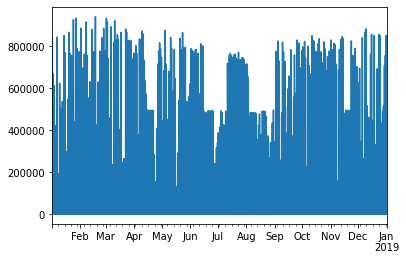

In [ ]:
data_melt.value.plot()  #날씨에 영향을 많이 받는다.

In [ ]:
#이제 날씨정보를 붙이면된다 merge를 써서 

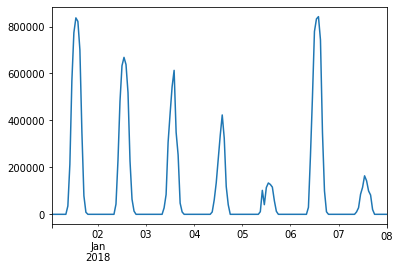

In [ ]:
data_melt.value[0:24*7].plot()

###문제

> 일별 발전량


In [ ]:
data_group = data_melt.groupby('날짜')
data_day_sum = data_group.sum()
data_day_sum

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


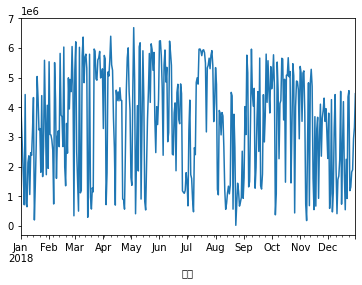

In [ ]:
data_day_sum.value.plot()

In [ ]:
data_value

###수치형 값의 스케일 조정

> 값의 범위 조정 0,1

> 표준화 : 값의 평균=0 표준편차=1로 조정